In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
train_raw = pd.read_csv("/Users/reetkanjilal/Downloads/train_amex/train.csv")
test_raw = pd.read_csv("/Users/reetkanjilal/Downloads/test.csv")

In [3]:
hist_user_log_raw = pd.read_csv("/Users/reetkanjilal/Downloads/train_amex/historical_user_logs.csv")
hist_user_log_raw.columns = ['DateTime', 'user_id', 'product', 'action_log']

In [5]:
hist_user_log_raw.shape

(24287534, 4)

In [13]:
# 
train_raw['DateTime'].max()

'2017-07-07 23:59'

In [12]:
hist_user_log_raw['DateTime'].max()

'2017-07-01 23:59'

In [14]:
train_merged = pd.merge(train_raw,hist_user_log_raw,how='left', on=['user_id', 'product'])
test_merged = pd.merge(test_raw,hist_user_log_raw,how='left', on=['user_id', 'product'])


In [15]:
print (train_raw.shape)
print (train_merged.shape)

print (test_raw.shape)
print (test_merged.shape)


(463291, 15)
(463291, 16)
(128858, 14)
(128858, 15)


In [16]:
#missing data
total = train_merged.isnull().sum().sort_values(ascending=False)
percent = (train_merged.isnull().sum()/train_merged.isnull().count()).sort_values(ascending=False)
uniq = train_merged.nunique()
missing_data = pd.concat([total, percent,uniq], axis=1, keys=['Total', 'Percent','uniq'])
missing_data

/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Total,Percent,uniq
DateTime,0,0.000000,8610
action_log,463291,1.000000,0
age_level,18243,0.039377,7
campaign_id,0,0.000000,10
city_development_index,125129,0.270087,4
gender,18243,0.039377,2
is_click,0,0.000000,2
product,0,0.000000,10
product_category_1,0,0.000000,5
product_category_2,365854,0.789685,29


In [37]:
train_raw['user_depth'].value_counts()

3.0    402798
2.0     30389
1.0     11861
Name: user_depth, dtype: int64

In [41]:
train_mod['product_category_2_146115'].value_counts()

0    463291
Name: product_category_2_146115, dtype: int64

In [34]:
train_mod['age_level_0'] = [1 if i == 0 else 0 for i in train_raw['age_level']]

In [159]:
def transform(data):
  warnings.filterwarnings("ignore")
  
  data['action_log_view'].fillna(0, inplace = True)
  data['action_log_interest'].fillna(0, inplace = True)
  
  data['gender_m'] = [1 if i == "Male" else 0 for i in data['gender']]
  data['gender_f'] = [1 if i == "Female" else 0 for i in data['gender']]
  
  data['user_depth_1'] = [1 if i == 1 else 0 for i in data['user_depth']]
  data['user_depth_2'] = [1 if i == 2 else 0 for i in data['user_depth']]
  data['user_depth_3'] = [1 if i == 3 else 0 for i in data['user_depth']]
  
  data['age_level_0'] = [1 if i == 0 else 0 for i in data['age_level']]
  data['age_level_1'] = [1 if i == 1 else 0 for i in data['age_level']]
  data['age_level_2'] = [1 if i == 2 else 0 for i in data['age_level']]
  data['age_level_3'] = [1 if i == 3 else 0 for i in data['age_level']]
  data['age_level_4'] = [1 if i == 4 else 0 for i in data['age_level']]
  data['age_level_5'] = [1 if i == 5 else 0 for i in data['age_level']]
  data['age_level_6'] = [1 if i == 6 else 0 for i in data['age_level']]
  
  data['campaign_id_82320'] = [1 if i == 82320 else 0 for i in data['campaign_id']]
  data['campaign_id_98970'] = [1 if i == 98970 else 0 for i in data['campaign_id']]
  data['campaign_id_105960'] = [1 if i == 105960 else 0 for i in data['campaign_id']]
  data['campaign_id_118601'] = [1 if i == 118601 else 0 for i in data['campaign_id']]
  data['campaign_id_359520'] = [1 if i == 359520 else 0 for i in data['campaign_id']]
  data['campaign_id_360936'] = [1 if i == 360936 else 0 for i in data['campaign_id']]
  data['campaign_id_396664'] = [1 if i == 396664 else 0 for i in data['campaign_id']]
  data['campaign_id_404347'] = [1 if i == 404347 else 0 for i in data['campaign_id']]
  data['campaign_id_405490'] = [1 if i == 405490 else 0 for i in data['campaign_id']]
  
  data['city_development_index_1'] = [1 if i == 1.0 else 0 for i in data['city_development_index']]
  data['city_development_index_2'] = [1 if i == 2.0 else 0 for i in data['city_development_index']]
  data['city_development_index_3'] = [1 if i == 3.0 else 0 for i in data['city_development_index']]
  data['city_development_index_4'] = [1 if i == 4.0 else 0 for i in data['city_development_index']]
  
  data['product_A'] = [1 if i == "A" else 0 for i in data['product']]
  data['product_B'] = [1 if i == "B" else 0 for i in data['product']]
  data['product_C'] = [1 if i == "C" else 0 for i in data['product']]
  data['product_D'] = [1 if i == "D" else 0 for i in data['product']]
  data['product_E'] = [1 if i == "E" else 0 for i in data['product']]
  data['product_F'] = [1 if i == "F" else 0 for i in data['product']]
  data['product_G'] = [1 if i == "G" else 0 for i in data['product']]
#   data['product_H'] = [1 if i == "H" else 0 for i in data['product']]
  data['product_I'] = [1 if i == "I" else 0 for i in data['product']]
  data['product_J'] = [1 if i == "J" else 0 for i in data['product']]
  
  data['product_category_1_1'] = [1 if i == 1 else 0 for i in data['product_category_1']]
  data['product_category_1_2'] = [1 if i == 2 else 0 for i in data['product_category_1']]
  data['product_category_1_3'] = [1 if i == 3 else 0 for i in data['product_category_1']]
#   data['product_category_1_4'] = [1 if i == "4" else 0 for i in data['product_category_1']]
  data['product_category_1_5'] = [1 if i == 5 else 0 for i in data['product_category_1']]
  
  data['product_category_2_82527'] = [1 if i == 82527 else 0 for i in data['product_category_2']]
  data['product_category_2_146115'] = [1 if i == 146115 else 0 for i in data['product_category_2']]
  data['product_category_2_270915'] = [1 if i == 270915 else 0 for i in data['product_category_2']]
  data['product_category_2_254132'] = [1 if i == 254132 else 0 for i in data['product_category_2']]
  data['product_category_2_419804'] = [1 if i == 419804 else 0 for i in data['product_category_2']]
  data['product_category_2_269093'] = [1 if i == 269093 else 0 for i in data['product_category_2']]
  data['product_category_2_168114'] = [1 if i == 168114 else 0 for i in data['product_category_2']]
  data['product_category_2_408790'] = [1 if i == 408790 else 0 for i in data['product_category_2']]
  data['product_category_2_235358'] = [1 if i == 235358 else 0 for i in data['product_category_2']]
  data['product_category_2_18595'] = [1 if i == 18595 else 0 for i in data['product_category_2']]
  data['product_category_2_234846'] = [1 if i == 234846 else 0 for i in data['product_category_2']]
  data['product_category_2_447834'] = [1 if i == 447834 else 0 for i in data['product_category_2']]
  data['product_category_2_32026'] = [1 if i == 32026 else 0 for i in data['product_category_2']]
  data['product_category_2_143597'] = [1 if i == 143597 else 0 for i in data['product_category_2']]
  data['product_category_2_255689'] = [1 if i == 255689 else 0 for i in data['product_category_2']]
  data['product_category_2_450184'] = [1 if i == 450184 else 0 for i in data['product_category_2']]
  data['product_category_2_327439'] = [1 if i == 327439 else 0 for i in data['product_category_2']]
  
  
  data['user_group_id_0'] = [1 if i == 0 else 0 for i in data['user_group_id']]
  data['user_group_id_1'] = [1 if i == 1 else 0 for i in data['user_group_id']]
  data['user_group_id_2'] = [1 if i == 2 else 0 for i in data['user_group_id']]
  data['user_group_id_3'] = [1 if i == 3 else 0 for i in data['user_group_id']]
  data['user_group_id_4'] = [1 if i == 4 else 0 for i in data['user_group_id']]
  data['user_group_id_5'] = [1 if i == 5 else 0 for i in data['user_group_id']]
  data['user_group_id_6'] = [1 if i == 6 else 0 for i in data['user_group_id']]
  data['user_group_id_7'] = [1 if i == 7 else 0 for i in data['user_group_id']]
  data['user_group_id_8'] = [1 if i == 8 else 0 for i in data['user_group_id']]
  data['user_group_id_9'] = [1 if i == 9 else 0 for i in data['user_group_id']]
  data['user_group_id_10'] = [1 if i == 10 else 0 for i in data['user_group_id']]
  data['user_group_id_11'] = [1 if i == 11 else 0 for i in data['user_group_id']]
  data['user_group_id_12'] = [1 if i == 12 else 0 for i in data['user_group_id']]
 
  
  return(data)

In [160]:
def create_x(data):
  feature_list = ['var_1','gender_m','gender_f','user_depth_1','action_log_view','action_log_interest',
                  'age_level_3','age_level_4','age_level_5','age_level_6','campaign_id_82320','campaign_id_98970','campaign_id_105960','campaign_id_118601',
                  'city_development_index_1','city_development_index_2','city_development_index_3','city_development_index_4','product_A','product_B','product_C','product_D',
                  'product_category_1_1','product_category_1_2','product_category_1_3','product_category_1_5','product_category_2_82527','product_category_2_146115','product_category_2_270915','product_category_2_254132',
                  'product_category_2_18595','product_category_2_234846','product_category_2_447834','product_category_2_32026','product_category_2_143597','product_category_2_255689','product_category_2_450184','product_category_2_327439',
                  'user_group_id_5','user_group_id_6','user_group_id_7','user_group_id_8','user_group_id_9','user_group_id_10','user_group_id_11','user_group_id_12']
  
  X = data[feature_list]
  return(X)

def create_y(data):
  Y = data['is_click']
  return (Y)

In [45]:
print (train_merged.shape)
print (test_merged.shape)

(463291, 84)
(128858, 83)


In [46]:
# Data transformation

train_mod = transform(train_merged)
test_mod = transform(test_merged)

print ("train_mod shape : ",train_mod.shape)
print ("test_mod shape : ",test_mod.shape)

train_mod shape :  (463291, 84)
test_mod shape :  (128858, 83)


In [63]:
train_mod.nunique()

session_id                   463291
DateTime                       8610
user_id                      150347
product                          10
campaign_id                      10
webpage_id                        9
product_category_1                5
product_category_2               29
user_group_id                    13
gender                            2
age_level                         7
user_depth                        3
city_development_index            4
var_1                             2
is_click                          2
action_log                        0
gender_m                          2
gender_f                          2
user_depth_1                      2
user_depth_2                      2
user_depth_3                      2
age_level_0                       2
age_level_1                       2
age_level_2                       2
age_level_3                       2
age_level_4                       2
age_level_5                       2
age_level_6                 

In [28]:
train_mod.to_csv("train_mod.csv")
test_mod.to_csv("test_mod.csv")

In [133]:
train_mod['is_click'].value_counts()

0    431960
1     31331
Name: is_click, dtype: int64

In [15]:
# del train_merged
# del test_merged
# del train_raw
# # del test_raw
# del hist_user_log_raw

In [64]:
minority_class_len = len(train_mod[train_mod['is_click'] == 1])

mejor_indices = train_mod[train_mod.is_click == 0].index

random_indices = np.random.choice(mejor_indices,minority_class_len, replace=False)

minor_indices = train_mod[train_mod.is_click == 1].index

under_sample_indices = np.concatenate([minor_indices,random_indices])

under_sample = train_mod.loc[under_sample_indices]

print (train_mod.shape)
print (under_sample.shape)


(463291, 84)
(62662, 84)


In [66]:
# 
under_sample["is_click"].value_counts()
# train_mod["is_click"].value_counts()

1    31331
0    31331
Name: is_click, dtype: int64

In [67]:
X = create_x(under_sample)
y = create_y(under_sample)

X_test = create_x(test_mod)

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [68]:
X.shape

(62662, 44)

In [25]:
X.to_csv("X_train.csv")
y.to_csv("y_train.csv")

X_test.to_csv("X_test.csv")



In [72]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [73]:
print (X_test.shape)

(128858, 44)


In [74]:
print (X_val.shape)
print (y_val.shape)

(9400, 44)
(9400,)


In [147]:
y_train.head()

90450     1
15911     1
54177     1
185577    0
271962    0
Name: is_click, dtype: int64

### Model RF

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rand_f_cls = RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=10,max_features = 'sqrt')

In [70]:
rand_f_cls.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [279]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import 
from sklearn.metrics import roc_auc_score
def model_evaluate( model_ ,Y,X):
    pred_df = pd.DataFrame( { "actual": Y, "predicted" : model_.predict( X ) } )
    tn, fp, fn, tp = confusion_matrix(pred_df['actual'], pred_df["predicted"]).ravel()
    acc = roc_auc_score(pred_df["actual"], pred_df["predicted"])

    print("AUC: ",acc, "TN: ", tn, " : ", "FP: ", fp, "FN: ", fn, "TP:", tp )

In [71]:
model_evaluate(rand_f_cls,y_train,X_train)

AUC:  0.5 TN:  367162  :  FP:  0 FN:  26635 TP: 0


In [152]:
model_evaluate(rand_f_cls,y_val,X_val)

AUC:  0.5121147306535527 TN:  1829  :  FP:  2914 FN:  1683 TP: 2974


In [153]:
test_mod.shape

(128858, 83)

In [81]:
X_test.shape

(2880034, 46)

In [155]:
import os
os.getcwd()

'/Users/reetkanjilal/Hack/AVD_Amex_Nov16_18'

In [156]:
def predict_test( model_):
    ouput_test = pd.DataFrame( { "session_id": test_raw["session_id"], "is_click" : model_.predict(X_test) } )        
    ouput_test.to_csv("/Users/reetkanjilal/Hack/AVD_Amex_Nov16_18/RF_1.csv")
    return ouput_test

### Boosting

In [75]:
#Import libraries:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
def modelfit(alg, dtrain,y_train, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    
    fig, ax = plt.subplots(figsize=(12,18))
    xgb.plot_importance(alg, max_num_features=50, height=0.8,ax=ax)
    plt.show()
    
    
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [84]:

xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=10,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.5756
AUC Score (Train): 0.606220


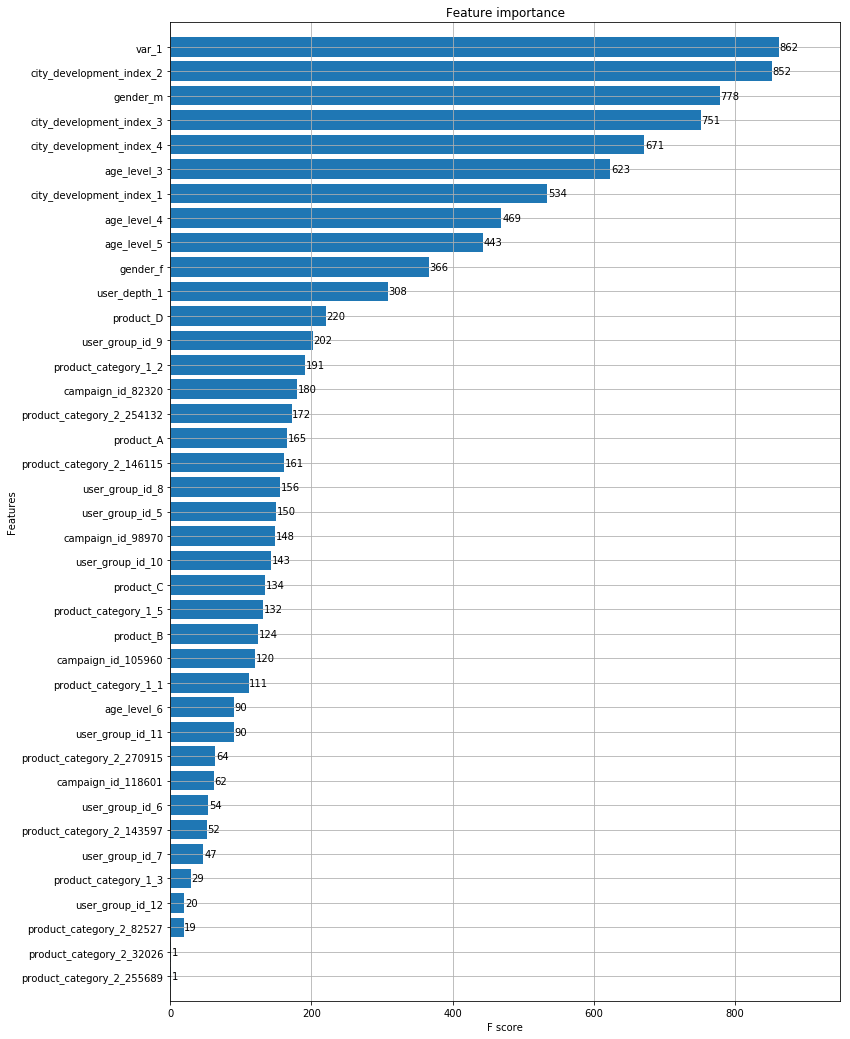

In [85]:
predictors = X_train.columns
modelfit(xgb1, X_train,y_train, predictors)



In [86]:
model_evaluate(xgb1,y_val,X_val)

AUC:  0.5561577788924025 TN:  2534  :  FP:  2209 FN:  1965 TP: 2692


/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
def predict_test( model_):
    ouput_test = pd.DataFrame( { "session_id": test_raw["session_id"], "is_click" : model_.predict(X_test) } )        
    ouput_test.to_csv("/Users/reetkanjilal/Hack/AVD_Amex_Nov16_18/XGB_2.csv")
    return ouput_test

In [90]:
predict_test(xgb1)

/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,is_click,session_id
0,1,411705
1,1,208263
2,0,239450
3,0,547761
4,1,574275
5,0,394913
6,0,562747
7,0,224359
8,0,395004
9,1,572855


#### Historical User info

In [104]:
# hist_user_log_raw['action_log_view'] = [1 if i == "view" else 0 for i in hist_user_log_raw['action_log']]
# hist_user_log_raw['action_log_interest'] = [1 if i == "interest" else 0 for i in hist_user_log_raw['action_log']]
hist_user_log_raw['user_id_prod'] = hist_user_log_raw['user_id'].astype(str).str.cat(hist_user_log_raw['product'].astype(str),sep='_')
# hist_user_log_raw[['user_id', 'product']].apply(lambda x: ''.join(x), axis=1)
hist_user_log_raw.head()

,DateTime,user_id,product,action_log,action_log_view,action_log_interest,user_id_prod
0,2017-05-28 15:44,704,B,view,1,0,704_B
1,2017-05-29 07:08,499679,F,view,1,0,499679_F
2,2017-05-29 07:10,499679,G,view,1,0,499679_G
3,2017-05-29 07:10,499679,G,view,1,0,499679_G
4,2017-05-29 07:10,499679,G,view,1,0,499679_G


In [106]:
hist_user_log_raw_view = hist_user_log_raw.groupby('user_id_prod')['action_log_view','action_log_interest'].sum().reset_index()
hist_user_log_raw_view.head()

,user_id_prod,action_log_view,action_log_interest
0,1000001_A,13,0
1,1000001_B,5,0
2,1000001_C,9,0
3,1000001_D,34,2
4,1000001_F,7,0


In [108]:
train_raw['user_id_prod'] = train_raw['user_id'].astype(str).str.cat(train_raw['product'].astype(str),sep='_')
test_raw['user_id_prod'] = test_raw['user_id'].astype(str).str.cat(test_raw['product'].astype(str),sep='_')

In [118]:
train_merged = pd.merge(train_raw,hist_user_log_raw_view[['user_id_prod','action_log_view','action_log_interest']],how='left', on=['user_id_prod'])
test_merged = pd.merge(test_raw,hist_user_log_raw_view[['user_id_prod','action_log_view','action_log_interest']],how='left', on=['user_id_prod'])


print (train_raw.shape)
print (train_merged.shape)

print (test_raw.shape)
print (test_merged.shape)



(463291, 16)
(463291, 18)
(128858, 15)
(128858, 17)


In [161]:
# Data transformation

train_mod = transform(train_merged)
test_mod = transform(test_merged)

print ("train_mod shape : ",train_mod.shape)
print ("test_mod shape : ",test_mod.shape)

train_mod shape :  (463291, 86)
test_mod shape :  (128858, 85)


In [168]:
train_mod['session_id'].nunique()

463291

In [193]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 5)

poly_features = ['action_log_view', 'action_log_interest']



def poly_transform(data):
    df = data[poly_features]
    poly_transformer.fit(df)
    df = poly_transformer.transform(df)
    
    df = pd.DataFrame(df,columns = poly_transformer.get_feature_names(['action_log_view', 'action_log_interest']))
    
    df['session_id'] = data['session_id']
    
    data = data.merge(df.iloc[:,3:],on = 'session_id',how = 'left')


    print('Poly shape : ', df.shape)
    print ("Data Shape : ",data.shape)
    return data, df

In [198]:
train_mod_1, ply_trn = poly_transform(train_mod)
test_mod_1, ply_tst = poly_transform(test_mod)
# train_mod[['action_log_view', 'action_log_interest']].isna().any()

Poly shape :  (463291, 22)
Data Shape :  (463291, 104)
Poly shape :  (128858, 22)
Data Shape :  (128858, 103)


In [217]:
feature_list = ['var_1','gender_m','gender_f','user_depth_1','action_log_view','action_log_interest',
                  'age_level_3','age_level_4','age_level_5','age_level_6','campaign_id_82320','campaign_id_98970','campaign_id_105960','campaign_id_118601',
                  'city_development_index_1','city_development_index_2','city_development_index_3','city_development_index_4','product_A','product_B','product_C','product_D',
                  'product_category_1_1','product_category_1_2','product_category_1_3','product_category_1_5','product_category_2_82527','product_category_2_146115','product_category_2_270915','product_category_2_254132',
                  'product_category_2_18595','product_category_2_234846','product_category_2_447834','product_category_2_32026','product_category_2_143597','product_category_2_255689','product_category_2_450184','product_category_2_327439',
                  'user_group_id_5','user_group_id_6','user_group_id_7','user_group_id_8','user_group_id_9','user_group_id_10','user_group_id_11','user_group_id_12']
  
    
poly_feature = ['action_log_view^2', 'action_log_view action_log_interest',
                   'action_log_interest^2', 'action_log_view^3',
                   'action_log_view^2 action_log_interest',
                   'action_log_view action_log_interest^2', 'action_log_interest^3',
                   'action_log_view^4', 'action_log_view^3 action_log_interest',
                   'action_log_view^2 action_log_interest^2',
                   'action_log_view action_log_interest^3', 'action_log_interest^4',
                   'action_log_view^5', 'action_log_view^4 action_log_interest',
                   'action_log_view^3 action_log_interest^2',
                   'action_log_view^2 action_log_interest^3',
                   'action_log_view action_log_interest^4', 'action_log_interest^5']


all_features = feature_list + poly_feature

In [219]:
train_mod_1[all_features].head()

,var_1,gender_m,gender_f,user_depth_1,action_log_view,action_log_interest,age_level_3,age_level_4,age_level_5,age_level_6,...,action_log_view^3 action_log_interest,action_log_view^2 action_log_interest^2,action_log_view action_log_interest^3,action_log_interest^4,action_log_view^5,action_log_view^4 action_log_interest,action_log_view^3 action_log_interest^2,action_log_view^2 action_log_interest^3,action_log_view action_log_interest^4,action_log_interest^5
0,0,0,1,0,5.0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,3125.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0,11.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,161051.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0,11.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,161051.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,0,8.0,1.0,1,0,0,0,...,512.0,64.0,8.0,1.0,32768.0,4096.0,512.0,64.0,8.0,1.0
4,1,1,0,0,3.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,243.0,0.0,0.0,0.0,0.0,0.0


In [221]:


def create_x(data):
    feature_list = ['var_1','gender_m','gender_f','user_depth_1','action_log_view','action_log_interest',
                  'age_level_3','age_level_4','age_level_5','age_level_6','campaign_id_82320','campaign_id_98970','campaign_id_105960','campaign_id_118601',
                  'city_development_index_1','city_development_index_2','city_development_index_3','city_development_index_4','product_A','product_B','product_C','product_D',
                  'product_category_1_1','product_category_1_2','product_category_1_3','product_category_1_5','product_category_2_82527','product_category_2_146115','product_category_2_270915','product_category_2_254132',
                  'product_category_2_18595','product_category_2_234846','product_category_2_447834','product_category_2_32026','product_category_2_143597','product_category_2_255689','product_category_2_450184','product_category_2_327439',
                  'user_group_id_5','user_group_id_6','user_group_id_7','user_group_id_8','user_group_id_9','user_group_id_10','user_group_id_11','user_group_id_12']
  
    
    poly_feature = ['action_log_view^2', 'action_log_view action_log_interest',
                   'action_log_interest^2', 'action_log_view^3',
                   'action_log_view^2 action_log_interest',
                   'action_log_view action_log_interest^2', 'action_log_interest^3',
                   'action_log_view^4', 'action_log_view^3 action_log_interest',
                   'action_log_view^2 action_log_interest^2',
                   'action_log_view action_log_interest^3', 'action_log_interest^4',
                   'action_log_view^5', 'action_log_view^4 action_log_interest',
                   'action_log_view^3 action_log_interest^2',
                   'action_log_view^2 action_log_interest^3',
                   'action_log_view action_log_interest^4', 'action_log_interest^5']


    all_features = feature_list + poly_feature
  
    X = data[all_features]
  
    return(X)

def create_y(data):
    Y = data['is_click']
    return (Y)

Class 0: 431960
Class 1: 31331
Proportion: 13.79 : 1


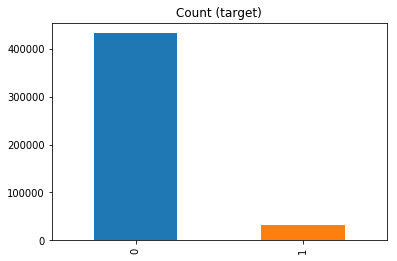

In [241]:
target_count = train_mod.is_click.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [243]:
!pip install imblearn

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [246]:
# import sys
sys.path.append("/Users/reetkanjilal/anaconda/lib/python2.7/site-packages")

In [247]:
sys.path

['',
 '/Users/reetkanjilal/ml/IIMB_kaggle/lib/python35.zip',
 '/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5',
 '/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/plat-darwin',
 '/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/lib-dynload',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/plat-darwin',
 '/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages',
 '/Users/reetkanjilal/ml/IIMB_kaggle/lib/python3.5/site-packages/IPython/extensions',
 '/Users/reetkanjilal/.ipython',
 '/Users/reetkanjilal/anaconda/lib/python2.7/site-packages']

In [248]:

from imblearn.over_sampling import SMOTE

In [286]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)


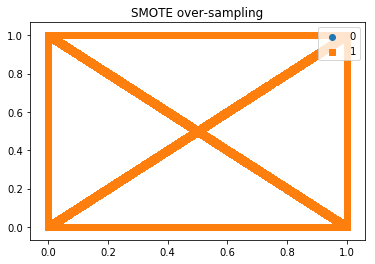

In [257]:
from matplotlib import pyplot as plt

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [287]:
names_x = X.columns
# names_y = y.columns
X_sm = pd.DataFrame(X_sm)
X_sm.columns = names_x
X_sm.head()

# y_sm = pd.DataFrame(y_sm)
# y_sm.columns = ['is_click']

,var_1,gender_m,gender_f,user_depth_1,action_log_view,action_log_interest,age_level_3,age_level_4,age_level_5,age_level_6,...,action_log_view^3 action_log_interest,action_log_view^2 action_log_interest^2,action_log_view action_log_interest^3,action_log_interest^4,action_log_view^5,action_log_view^4 action_log_interest,action_log_view^3 action_log_interest^2,action_log_view^2 action_log_interest^3,action_log_view action_log_interest^4,action_log_interest^5
0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3125.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,161051.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,161051.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,8.0,1.0,1.0,0.0,0.0,0.0,...,512.0,64.0,8.0,1.0,32768.0,4096.0,512.0,64.0,8.0,1.0
4,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,243.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# train_mod.isnull().any()
test_mod['action_log_view'].describe()

count    101518.000000
mean         27.669871
std          49.814709
min           0.000000
25%           4.000000
50%          11.000000
75%          31.000000
max        1699.000000
Name: action_log_view, dtype: float64

In [222]:
minority_class_len = len(train_mod_1[train_mod['is_click'] == 1])

mejor_indices = train_mod_1[train_mod_1.is_click == 0].index

random_indices = np.random.choice(mejor_indices,minority_class_len, replace=False)

minor_indices = train_mod[train_mod_1.is_click == 1].index

under_sample_indices = np.concatenate([minor_indices,random_indices])

under_sample = train_mod_1.loc[under_sample_indices]

print (train_mod_1.shape)
print (under_sample.shape)

(463291, 104)
(62662, 104)


In [251]:
X = create_x(train_mod_1)
y = create_y(train_mod_1)

X_test = create_x(test_mod_1)



AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [288]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.15, random_state=42)

print ("X_train : ",X_train.shape)
print ("X_val : ",X_val.shape)


X_train :  (734332, 64)
X_val :  (129588, 64)


In [298]:

xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)




Model Report
Accuracy : 0.7419
AUC Score (Train): 0.828012


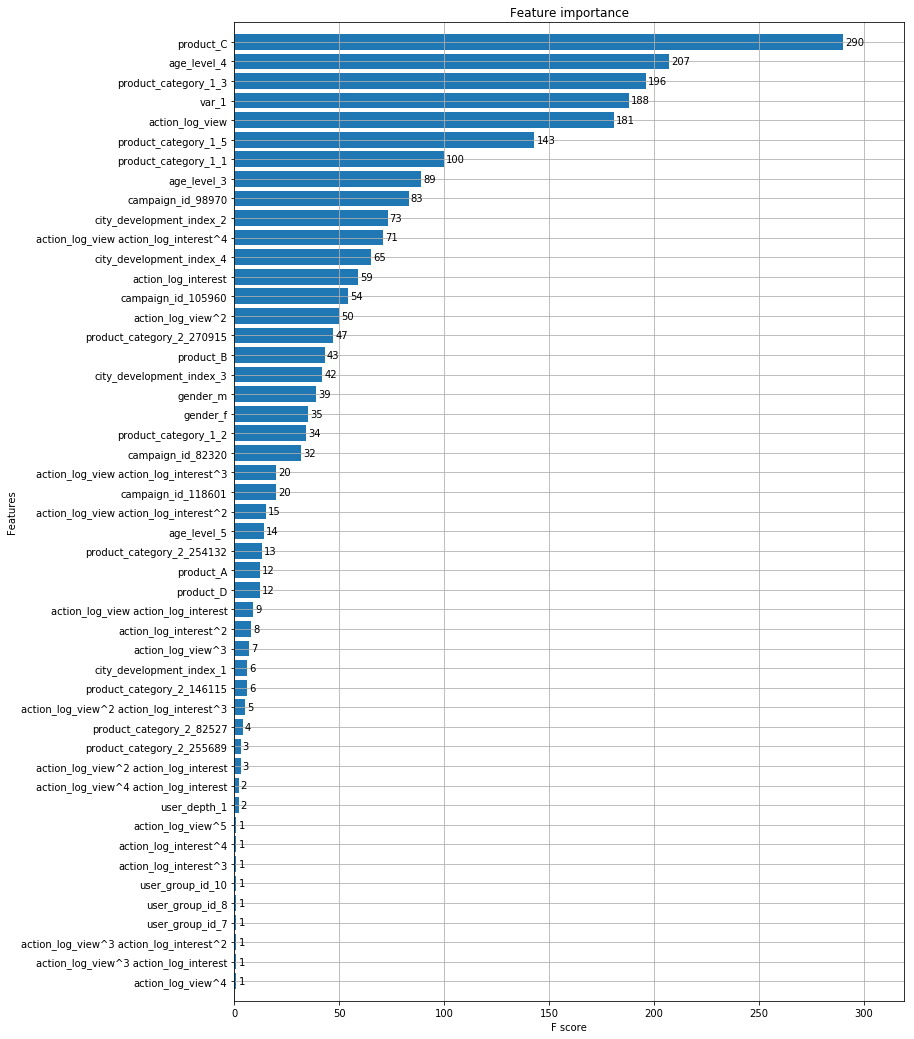

In [299]:
predictors = X_train.columns
modelfit(xgb1, X_train,y_train, predictors)


In [300]:
model_evaluate(xgb1,y_val,X_val)
# X_val.shape

AUC:  0.743229874201223 TN:  56798  :  FP:  8069 FN:  25186 TP: 39535


In [297]:
X_test.isnull().any()

var_1                                      False
gender_m                                   False
gender_f                                   False
user_depth_1                               False
action_log_view                            False
action_log_interest                        False
age_level_3                                False
age_level_4                                False
age_level_5                                False
age_level_6                                False
campaign_id_82320                          False
campaign_id_98970                          False
campaign_id_105960                         False
campaign_id_118601                         False
city_development_index_1                   False
city_development_index_2                   False
city_development_index_3                   False
city_development_index_4                   False
product_A                                  False
product_B                                  False
product_C           

In [301]:
def predict_test( model_):
    ouput_test = pd.DataFrame( { "session_id": test_raw["session_id"], "is_click" : model_.predict(X_test) } )        
    ouput_test.to_csv("/Users/reetkanjilal/Hack/AVD_Amex_Nov16_18/XGB4.csv")
    return ouput_test

In [302]:
predict_test(xgb1)

,is_click,session_id
0,0,411705
1,0,208263
2,0,239450
3,0,547761
4,0,574275
5,0,394913
6,0,562747
7,0,224359
8,0,395004
9,0,572855


In [291]:
def modelfit(alg, dtrain,y_train, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    
    fig, ax = plt.subplots(figsize=(12,18))
    xgb.plot_importance(alg, max_num_features=50, height=0.8,ax=ax)
    plt.show()
    

In [280]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import 
from sklearn.metrics import roc_auc_score
def model_evaluate( model_ ,Y,X):
    pred_df = pd.DataFrame( { "actual": Y, "predicted" : model_.predict( X ) } )
    tn, fp, fn, tp = confusion_matrix(pred_df['actual'], pred_df["predicted"]).ravel()
    acc = roc_auc_score(pred_df["actual"], pred_df["predicted"])

    print("AUC: ",acc, "TN: ", tn, " : ", "FP: ", fp, "FN: ", fn, "TP:", tp )

In [116]:
test_raw.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,user_id_prod
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0,732573_J
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1,172910_I
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1,172910_I
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0,557318_G
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1,923896_H
